In [14]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load the data
drs_data = pd.read_excel("drs_data.xlsx", header=0)
# Print the first 5 rows of the data
drs_data.head()

,Match,Home Team,Away Team,Innings,Batting Team,Fielding Team,Over,Review By,Umpire,Umpire Abbreviation,Decision Challenged,Batter,Result,Umpires Call
0,1,CSK,RCB,1,RCB,CSK,19,RCB,HAS Khalid,HASK,Wide,KD Karthik,Upheld,No
1,1,CSK,RCB,1,RCB,CSK,20,RCB,VK Sharma,VKS,Wide,KD Karthik,Struck Down,No
2,1,CSK,RCB,1,RCB,CSK,20,RCB,VK Sharma,VKS,Wide,KD Karthik,Struck Down,No
3,1,CSK,RCB,2,CSK,RCB,13,RCB,VK Sharma,VKS,Wicket,S Dube,Struck Down,No
4,1,CSK,RCB,2,CSK,RCB,19,RCB,HAS Khalid,HASK,Wicket,S Dube,Struck Down,No


In [16]:
# Check if all the columns are of correct data type
drs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Match                44 non-null     int64 
 1   Home Team            44 non-null     object
 2   Away Team            44 non-null     object
 3   Innings              44 non-null     int64 
 4   Batting Team         44 non-null     object
 5   Fielding Team        44 non-null     object
 6   Over                 44 non-null     int64 
 7   Review By            44 non-null     object
 8   Umpire               44 non-null     object
 9   Umpire Abbreviation  44 non-null     object
 10  Decision Challenged  44 non-null     object
 11  Batter               44 non-null     object
 12  Result               44 non-null     object
 13  Umpires Call         44 non-null     object
dtypes: int64(3), object(11)
memory usage: 4.9+ KB


### How many reviews in each innings?

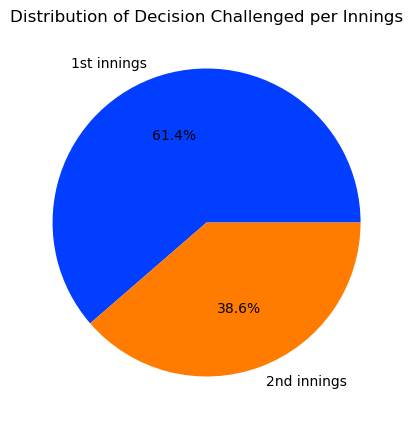

In [17]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
# Calculate the count of each decision challenged
innings_counts = drs_data['Innings'].value_counts()
# Create a pie chart
plt.pie(innings_counts, labels=["1st innings", "2nd innings"], autopct='%1.1f%%', colors=sns.color_palette('bright') )
plt.title('Distribution of Decision Challenged per Innings')
# Display the chart
plt.show()

### How many reviews have been taken in each over?

/Users/harshvardhanuppaluru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


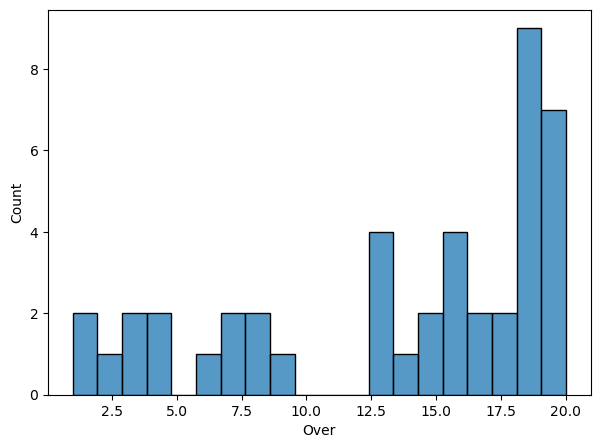

In [18]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=drs_data, x="Over", bins=20, stat="count")
plt.show()


### Wide reviews vs Wicket reviews vs Noball reviews

In [19]:
wide_reviews = drs_data[drs_data["Decision Challenged"]=="Wide"]
wicket_reviews = drs_data[drs_data["Decision Challenged"]=="Wicket"]
noball_reviews = drs_data[drs_data["Decision Challenged"]=="NoBall"]

In [20]:
print("Wides have been reviewed", wide_reviews.__len__(), "times")
print("Wickets have been reviewed", wicket_reviews.__len__(), "times")
print("No Balls have been reviewed", noball_reviews.__len__(), "times")

Wides have been reviewed 20 times
Wickets have been reviewed 22 times
No Balls have been reviewed 2 times


/Users/harshvardhanuppaluru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


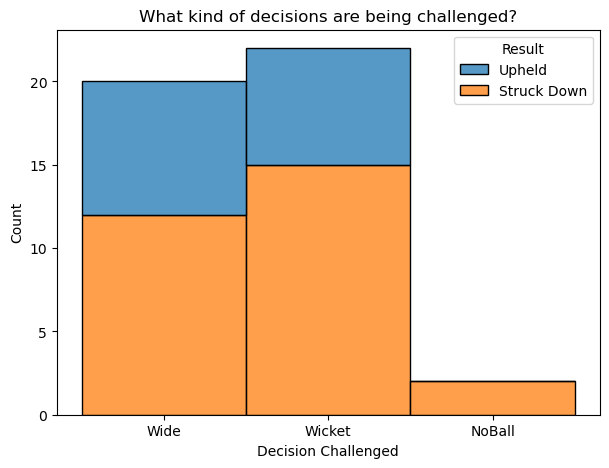

In [21]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=drs_data, x="Decision Challenged", hue="Result", multiple="stack", stat="count", legend=True)
ax.set_title("What kind of decisions are being challenged?");

### How well are umpires performing?

/Users/harshvardhanuppaluru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Umpire')

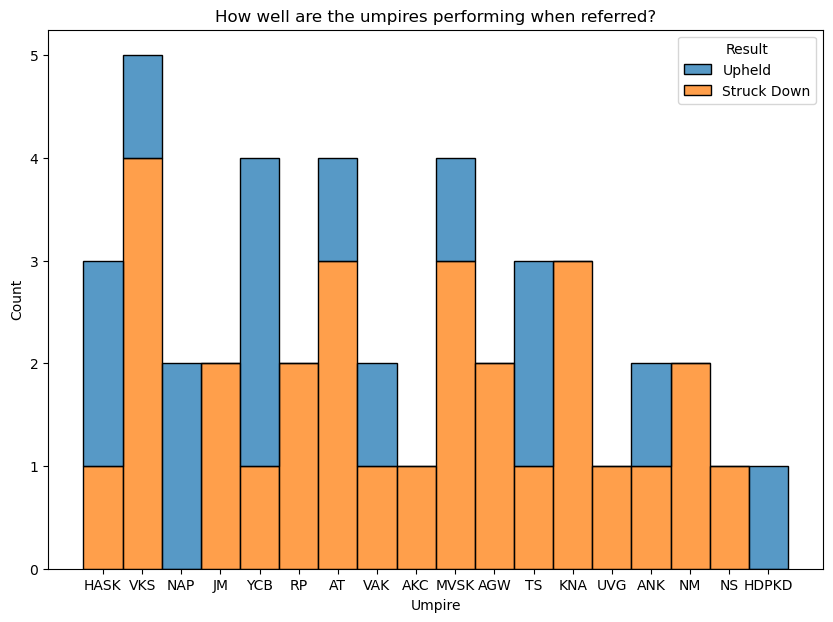

In [22]:
f = plt.figure(figsize=(10,7))
ax = f.add_subplot(1,1,1)
sns.histplot(data=drs_data, x="Umpire Abbreviation", hue="Result", multiple="stack", stat="count", legend=True)
ax.set_title("How well are the umpires performing when referred?");
ax.set_xlabel("Umpire")

### Which teams have reviewed the most?

/Users/harshvardhanuppaluru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


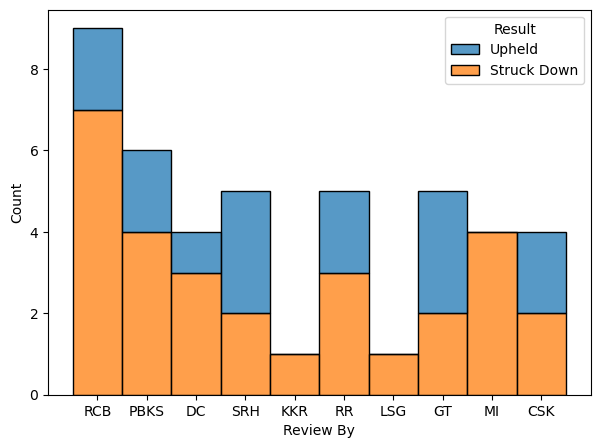

In [23]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
sns.histplot(data=drs_data, x="Review By", hue="Result", multiple="stack", stat="count", legend=True);

### Who asked for a referral? Batting or Bowling?